In [28]:
import re
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import statsmodels
import scipy as sc
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
%matplotlib inline
import scipy.stats as sts

In [29]:
with open('julia.txt', 'r') as f:
    data = f.readlines()
    
data = data[0][4:-4]
data = [float(x) for x in re.split(' ', data)]

In [30]:
class Coef_beta:
    np.random.seed(42)
    def __init__(self, len_data):
        self.norm_rv = sts.norm(0, 1)
        self._sigma = self.norm_rv.rvs(len_data)
        self._v = self.norm_rv.rvs(len_data)
        self._eps = self._sigma * self._v
    @staticmethod
    def get_var(data):
        print('дисперсия: {:f}'.format(sp.var(data, axis = 0)))
    @staticmethod
    def get_hist(data, bins = 20, color = 'blue'):
        plt.title('Histogram for {:d}'.format(len(data)))
        plt.hist(data, bins = bins, color = color) 
        plt.show()
    def fit(self):
        A1 = np.vstack([self._eps[:-1] * self._eps[:-1],self._sigma[:-1] * self._sigma[:-1], np.ones(len(self._sigma[:-1]))]).T
        model = smf.OLS(self._sigma[1:] * self._sigma[1:], pd.DataFrame(A1, columns = ['beta_1', 'gamma', 'beta_0']))
        self.results = model.fit()
        return self
    @property
    def get_beta(self):
        print(self.fit().results.summary())
    @property
    def get_beta_params(self):
        return self.fit().results.params
    def __repr__(self):
        return 'beta_1 = {:f} \n gamma = {:f} \n beta_0 = {:f}'.format(*self.fit().results.params)
    
class Coef_alpha(Coef_beta):
    def _fit(self, data):
        A = np.vstack([data[:-1], np.ones(len(data[:-1]))]).T
        model = smf.OLS(data[1:] - self._eps[1:], pd.DataFrame(A, columns = ['alpha', 'theta']))
        self.results = model.fit()
        return self
    @property
    def get_alpha(self):
        print(self.results.summary())
    @property
    def get_alpha_params(self):
        return self.results.params
    def __repr__(self):
        return 'alpha = {:f} \n theta = {:f}'.format(*self.results.params)
    
    
class Bootstrap(Coef_alpha, Coef_beta):
    def __init__(self, data):
        self.norm_rv = sts.norm(0, 1)
        self.sigma = self.norm_rv.rvs(1)
        self.eps = self.norm_rv.rvs(1)
        self.data = data
        Coef_beta.__init__(self, len(self.data))
        self.beta_0, self.gamma, self.beta_1 = Coef_beta.fit(self).get_beta_params
        Coef_alpha.__init__(self, len(self.data))
        self.alpha, self.theta = Coef_alpha._fit(self, self.data).get_alpha_params
      
    def sigma_t(self):
        return self.beta_0 + self.beta_1 * self.eps * self.eps + self.gamma * self.sigma * self.sigma

    def eps_t(self):
        v = self.norm_rv.rvs(1)
        return self.sigma * v

    def x_t(self, x):
        return self.theta + self.alpha * x + self.eps

    def get_boots(self, data_unique):
        result = []
        for el in data_unique:
            sigma = np.sqrt(self.sigma_t())
            eps = self.eps_t()
            result.append(self.x_t(el))
        result = np.array(result)
        return result.reshape((result.shape[0], ))
    
    def get_summ(self, data_unique):
        return shuffle(np.hstack((self.data, self.get_boots(data_unique))), random_state = 0)


-----------------------------------------------------------
длина равна: 262


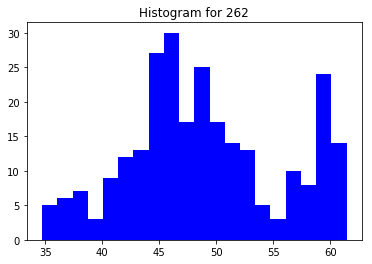

дисперсия: 44.733343
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     3840.
Date:                Tue, 22 May 2018   Prob (F-statistic):          2.48e-157
Time:                        15:37:24   Log-Likelihood:                -507.93
No. Observations:                 261   AIC:                             1020.
Df Residuals:                     259   BIC:                             1027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alpha          0.9786      0.01

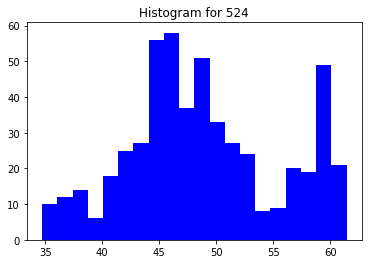

дисперсия: 43.806831
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3717
Date:                Tue, 22 May 2018   Prob (F-statistic):              0.542
Time:                        15:37:24   Log-Likelihood:                -1735.2
No. Observations:                 523   AIC:                             3474.
Df Residuals:                     521   BIC:                             3483.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alpha          0.0269      0.04

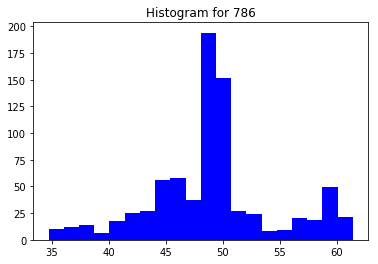

дисперсия: 29.294395
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.680
Date:                Tue, 22 May 2018   Prob (F-statistic):             0.0554
Time:                        15:37:25   Log-Likelihood:                -2450.1
No. Observations:                 785   AIC:                             4904.
Df Residuals:                     783   BIC:                             4913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alpha         -0.0694      0.03

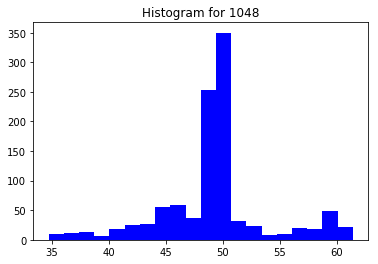

дисперсия: 22.149526
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.592
Date:                Tue, 22 May 2018   Prob (F-statistic):              0.207
Time:                        15:37:25   Log-Likelihood:                -3121.4
No. Observations:                1047   AIC:                             6247.
Df Residuals:                    1045   BIC:                             6257.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alpha         -0.0396      0.03

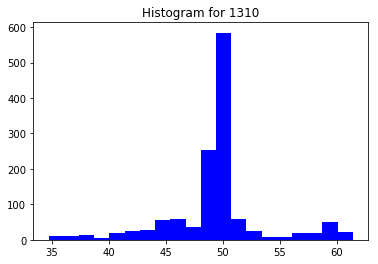

дисперсия: 17.965692
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.256
Date:                Tue, 22 May 2018   Prob (F-statistic):             0.0220
Time:                        15:37:25   Log-Likelihood:                -3781.6
No. Observations:                1309   AIC:                             7567.
Df Residuals:                    1307   BIC:                             7578.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alpha          0.0650      0.02

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in sqrt


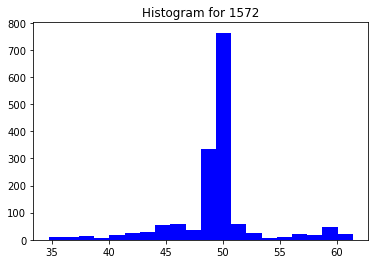

дисперсия: 15.007241
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.262
Date:                Tue, 22 May 2018   Prob (F-statistic):             0.0711
Time:                        15:37:26   Log-Likelihood:                -4407.6
No. Observations:                1571   AIC:                             8819.
Df Residuals:                    1569   BIC:                             8830.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alpha          0.0472      0.02

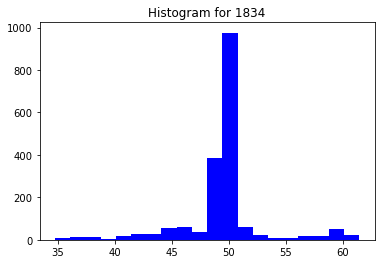

дисперсия: 12.881137
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     6.303
Date:                Tue, 22 May 2018   Prob (F-statistic):             0.0121
Time:                        15:37:26   Log-Likelihood:                -5016.2
No. Observations:                1833   AIC:                         1.004e+04
Df Residuals:                    1831   BIC:                         1.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alpha          0.0610      0.02

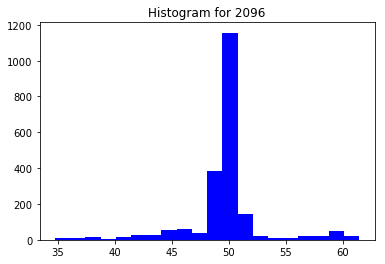

дисперсия: 11.418086
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8447
Date:                Tue, 22 May 2018   Prob (F-statistic):              0.358
Time:                        15:37:27   Log-Likelihood:                -5610.1
No. Observations:                2095   AIC:                         1.122e+04
Df Residuals:                    2093   BIC:                         1.124e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alpha         -0.0209      0.02

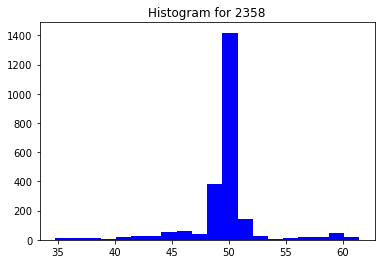

дисперсия: 10.159858
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07558
Date:                Tue, 22 May 2018   Prob (F-statistic):              0.783
Time:                        15:37:27   Log-Likelihood:                -6217.5
No. Observations:                2357   AIC:                         1.244e+04
Df Residuals:                    2355   BIC:                         1.245e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alpha          0.0060      0.02

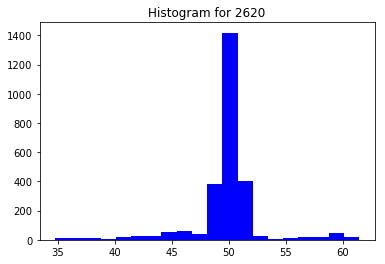

дисперсия: 9.428924
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1272
Date:                Tue, 22 May 2018   Prob (F-statistic):              0.721
Time:                        15:37:28   Log-Likelihood:                -6793.1
No. Observations:                2619   AIC:                         1.359e+04
Df Residuals:                    2617   BIC:                         1.360e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alpha          0.0073      0.021

In [31]:
data_unique = data.copy()
for i in range(10):
    print('-----------------------------------------------------------')
    print('длина равна:', len(data))
    ob = Bootstrap(data)
    ob.get_hist(data)
    ob.get_var(data)
    ob.get_alpha
    ob.get_beta
    data = ob.get_summ(data_unique)